In [3]:
import numpy as np

PyGraphviz and PyDotPlus not found;
drawing with spring layout;
will be slow.


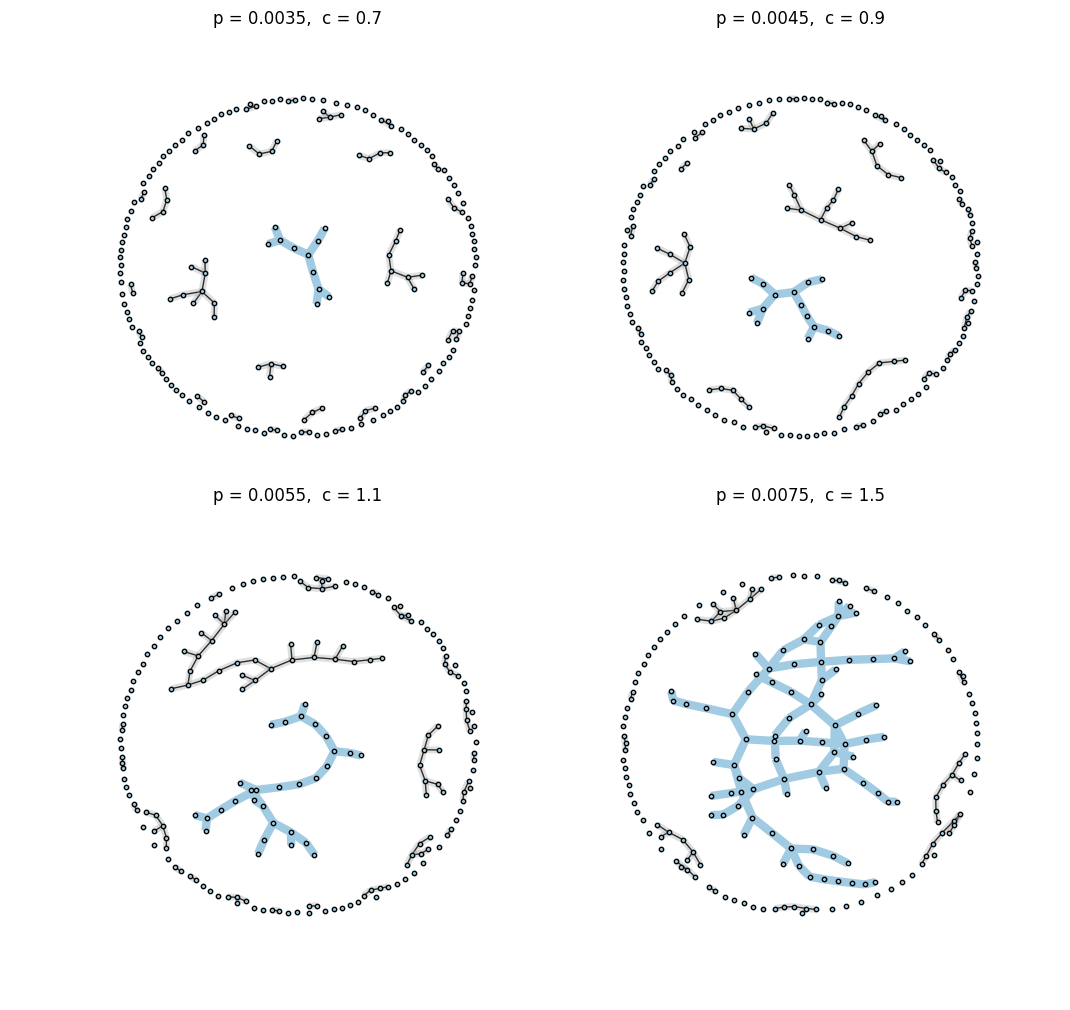

In [39]:
#!/usr/bin/env python
"""
This example illustrates the sudden appearance of a
giant connected component in a binomial random graph.

Requires pygraphviz and matplotlib to draw.

"""
#    Copyright (C) 2006-2016
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx
import math

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
    layout = graphviz_layout
except ImportError:
    try:
        import pydotplus
        from networkx.drawing.nx_pydot import graphviz_layout
        layout = graphviz_layout
    except ImportError:
        print("PyGraphviz and PyDotPlus not found;\n"
              "drawing with spring layout;\n"
              "will be slow.")
        layout = nx.spring_layout


n=200  # 150 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant=1.0/(n-1)
# p value at which graph is expected to become completely connected
p_conn=math.log(n)/float(n)

# the following range of p values should be close to the threshold
c = [0.7, 0.9, 1.1, 1.5]
pvals=[0.7 / (n-1), 0.9 / (n-1), 1.1 / (n-1), 1.5 / (n-1)]

region=220 # for pylab 2x2 subplot layout

plt.figure(figsize=(10,10))

plt.subplots_adjust(left=0,right=1,bottom=0,top=0.95,wspace=0.01,hspace=0.01)
for i,p in enumerate(pvals):
    G=nx.binomial_graph(n,p)
    pos=layout(G, k=0.4/ np.sqrt(n))
    region+=1
    plt.subplot(region)
    plt.title("p = %6.4f,  c = %1.1f"%(p, c[i]))
    nx.draw(G,pos,
            with_labels=False,
            node_size=10,
            node_color='#A0CBE2'
            )
    # identify largest connected component
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G0=Gcc[0]
    nx.draw_networkx_edges(G0,pos,
                           with_labels=False,
                           edge_color='#A0CBE2',
                           width=6.0
                        )
    # show other connected components
    for Gi in Gcc[1:]:
       if len(Gi)>1:
          nx.draw_networkx_edges(Gi,pos,
                                 with_labels=False,
                                 edge_color='#999999',
                                 alpha=0.3,
                                 width=5.0
                                 )
plt.savefig("giant_component.png")
plt.show() # display

In [17]:
pvals

[0.003517587939698492,
 0.004522613065326633,
 0.006030150753768844,
 0.007537688442211055]